In [1]:
####################################################################
# This is an automation Script that is intended to perform the     #
# following tasks:                                                 #
#                                                                  #
# 1.) web scrape and download the images from google               #
# 2.) categorise these images into different categories            #
# 3.) training a tensorflow classification model on this data      #
####################################################################

## Making some essential imports
import numpy as np 
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
import requests
from bs4 import BeautifulSoup 
import urllib.request as ur
from tensorflow.keras import layers

## defining our class which will do this 
## task for us
class DataCreatorAndCnnTrainer ():
    
    ##constructor
    def __init__(self, numClasses, classNameList):
        self.mNumClasses = numClasses
        self.mClassList = classNameList
        self.mIsImageDowloaded = False
        self.mIsDirectoriesMade = False
        self.mIsModelTrained = False
    
    
    
    ## A function for making directories
    def CreatDirectories(self):
        if self.mIsDirectoriesMade == True:
            print('Directories Exists Already.....')
            return
        
        ## creating Directories if uncreated
        os.makedirs('./input')
        for mem in self.mClassList:
            path = './input/' + str(mem)
            os.makedirs(path)
        
        self.mIsDirectoriesMade = True
    
    ## A Function for downloading files
    def FileDownloader(self, path, imageName, destpath):
        try:
            resource = ur.urlopen(path)
            output = open(destpath,"wb")
            output.write(resource.read())
            output.close()
        except:
            print ( str (imageName) + ' : Can not be downloaded')
            return
    
    
    ## A function for googling images
    def WebScrapper(self, catName):
        url = 'https://www.google.com/search?q=' + str(catName) + '&sxsrf=ALeKk00v68380BgtYZxaAgag_DD37E4Lgw:1608192602630&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjunr2myNTtAhWA7XMBHa__DzUQ_AUoAXoECB0QAw&biw=1536&bih=754'
        req = requests.get(url)
        soup = BeautifulSoup(req.content, 'html5lib') 
        allImgTags = soup.findAll('img')
        
        ##getting urls from img tabs
        linkSrc = []
        for image in allImgTags:
            linkSrc.append(image['src'])
        
        ## Now downloading images
        imgName = 0
        for link in linkSrc:
            imgPath = str(imgName) + '.jpg'
            savePath = './input/' + str(catName) + '/' + imgPath
            self.FileDownloader(path = link, imageName = imgName, destpath = savePath)
            imgName += 1
        
    ## Defining Download data Function
    def DownloadData (self):
        if self.mIsDirectoriesMade == False:
            self.CreatDirectories()
        
        if self.mIsImageDowloaded == True:
            print ('Image data is Already Downloaded.....')
            return
        
        for mem in self.mClassList :
            self.WebScrapper(mem)
        
        self.mIsImageDowloaded = True
        
    
    ## function for data visulatization
    def VisializeTheCategory (self, category, path = './input/'):
        plt.figure(figsize = (12, 12))
        
        ## plotting 10 examples from each categories
        catPath = path + str(category)
        itemList = os.listdir(catPath)
        
        pltNum = 1
        for mem in itemList:
            if pltNum >= 16:
                plt.show()
                return
            
            
            plt.subplot(5,3, pltNum)
            plt.title(category)
            plt.imshow(plt.imread(catPath + '/' + mem))
            plt.grid(True)
            pltNum += 1
   


    ## with web scrapping part completed lets write
    ## a function to trainmodel 
    def TrainMyCnn (self, batchSize = 5, height =224, width =224, epochs = 3, parentDirPath = './input'):
        
        ## Defining batch specfications
        batch_size = batchSize
        img_height = height
        img_width = width 
        
        ## loading training set
        training_ds = tf.keras.preprocessing.image_dataset_from_directory(
        parentDirPath,
        seed=42,
        image_size= (img_height, img_width),
        batch_size=batch_size      
        )
        
        class_names = training_ds.class_names
        
        ## Defining Cnn
        MyCnn = tf.keras.models.Sequential([
        layers.BatchNormalization(),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(len(class_names), activation= 'softmax')
        ])
        
        MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        ## lets train our CNN
        retVal = MyCnn.fit(training_ds,epochs = epochs)
        
        ## plotting training stats
        plt.plot(retVal.history['loss'], label = 'training loss')
        plt.plot(retVal.history['accuracy'], label = 'training accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        MyCnn.save('model.h5')
        
        
        
        

In [2]:
obj =  DataCreatorAndCnnTrainer(numClasses = 2, classNameList = ['cat', 'dog'])
obj.DownloadData()



0 : Can not be downloaded
0 : Can not be downloaded


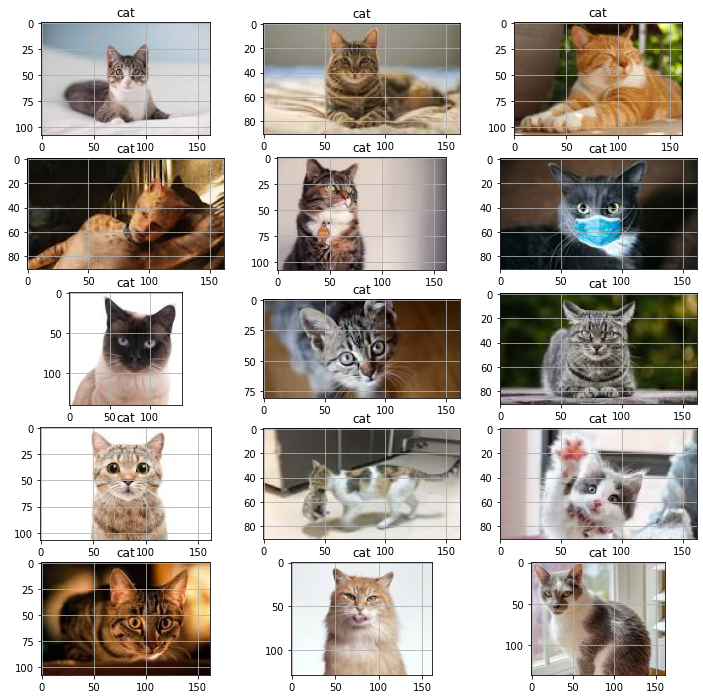

In [3]:
obj.VisializeTheCategory(category = 'cat')

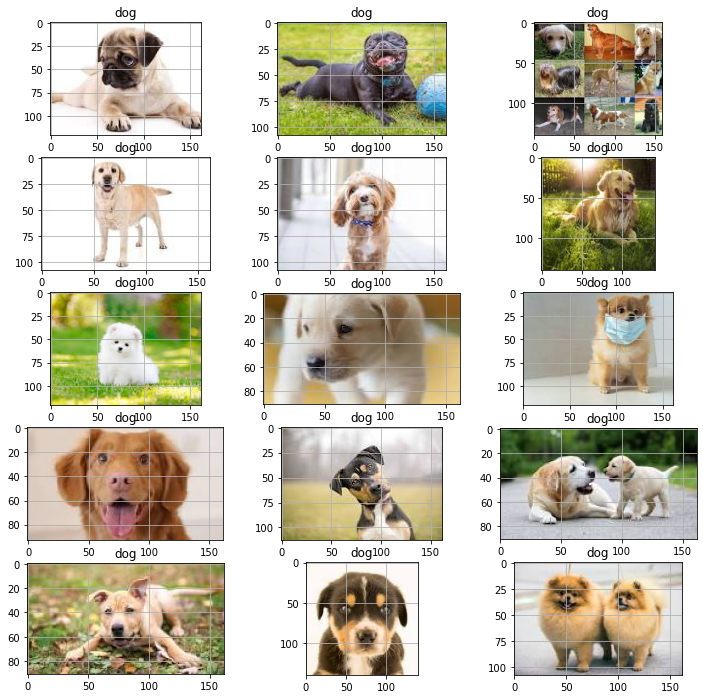

In [4]:
obj.VisializeTheCategory(category = 'dog')

In [5]:
! rm -rf input
##############################################################
# note : i am a lazy dev and made a mistake that i hard coded#
# input directory, i will correct this in future versions    #
##############################################################

obj2  =  DataCreatorAndCnnTrainer(numClasses = 5, classNameList = ['spider', 'grasshoper', 'ant', 'lizard', 'crocodile'])
obj2.DownloadData()

0 : Can not be downloaded
0 : Can not be downloaded
0 : Can not be downloaded
0 : Can not be downloaded
0 : Can not be downloaded


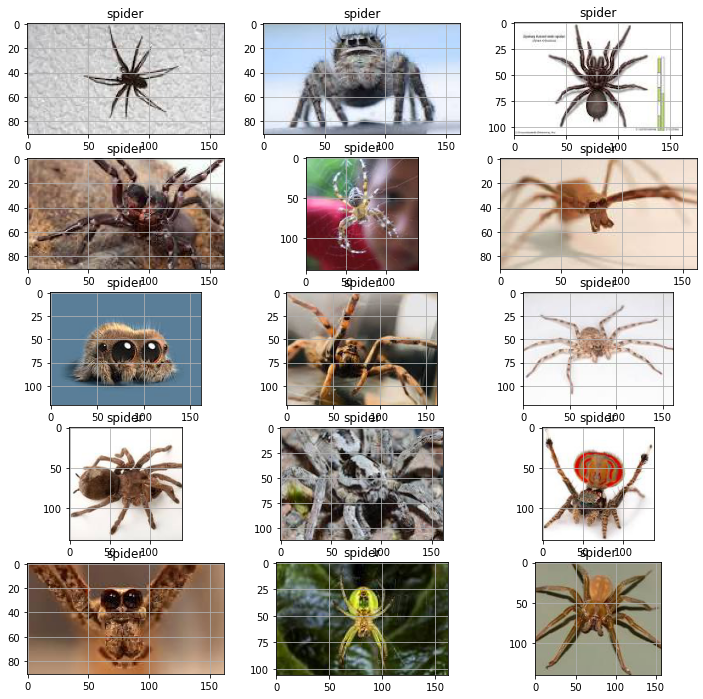

In [6]:
obj2.VisializeTheCategory(category = 'spider')

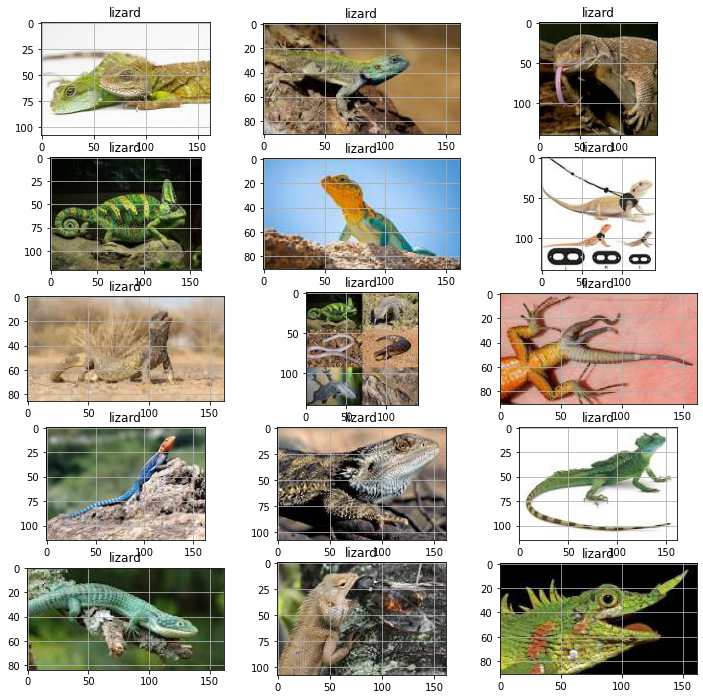

In [7]:
obj2.VisializeTheCategory(category = 'lizard')

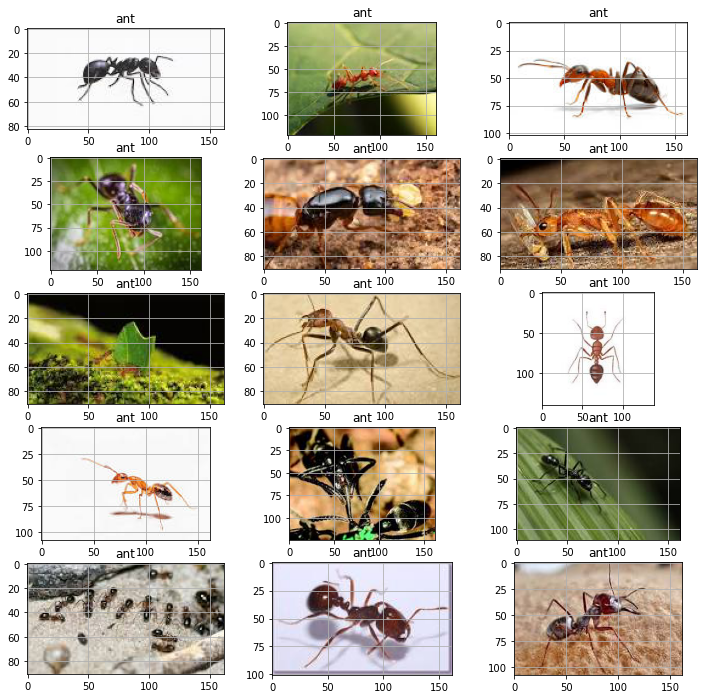

In [8]:
obj2.VisializeTheCategory(category = 'ant')

Found 100 files belonging to 5 classes.
Epoch 1/5
20/20 [==============================] - 9s 436ms/step - loss: 2.7870 - accuracy: 0.1400
Epoch 2/5
20/20 [==============================] - 8s 405ms/step - loss: 1.6501 - accuracy: 0.2200
Epoch 3/5
20/20 [==============================] - 8s 405ms/step - loss: 1.5563 - accuracy: 0.3400
Epoch 4/5
20/20 [==============================] - 8s 406ms/step - loss: 1.4856 - accuracy: 0.3600
Epoch 5/5
20/20 [==============================] - 8s 416ms/step - loss: 1.3103 - accuracy: 0.5400


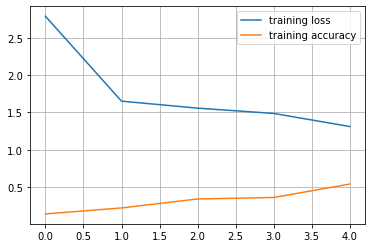

In [9]:
#### Training our model for object2
obj2.TrainMyCnn(epochs=5)


In [10]:
! rm -rf input